In [2]:
pip install hmmlearn

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 660.6 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/125.4 kB 550.5 kB/s eta 0:00:01
   -------------------------------------  122.9/125.4 kB 804.6 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 615.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm


In [4]:
# Define the state space
states = ["Sunny", "Rainy"]
n_states = len(states)
print('Number of hidden states :',n_states)
# Define the observation space
observations = ["Dry", "Wet"]
n_observations = len(observations)
print('Number of observations :',n_observations)


Number of hidden states : 2
Number of observations : 2


In [5]:
# Define the initial state distribution
state_probability = np.array([0.6, 0.4])
print("State probability: ", state_probability)

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.3],
								[0.3, 0.7]])
print("\nTransition probability:\n", transition_probability)
# Define the observation likelihoods
emission_probability= np.array([[0.9, 0.1],
								[0.2, 0.8]])
print("\nEmission probability:\n", emission_probability)


State probability:  [0.6 0.4]

Transition probability:
 [[0.7 0.3]
 [0.3 0.7]]

Emission probability:
 [[0.9 0.1]
 [0.2 0.8]]


In [6]:
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability


In [7]:
# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)
observations_sequence


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [8]:
# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)


Most likely hidden states: [0 1 1 1 0 0]


In [9]:
log_probability, hidden_states = model.decode(observations_sequence,
											lengths = len(observations_sequence),
											algorithm ='viterbi' )

print('Log Probability :',log_probability)
print("Most likely hidden states:", hidden_states)


Log Probability : -6.360602626270058
Most likely hidden states: [0 1 1 1 0 0]


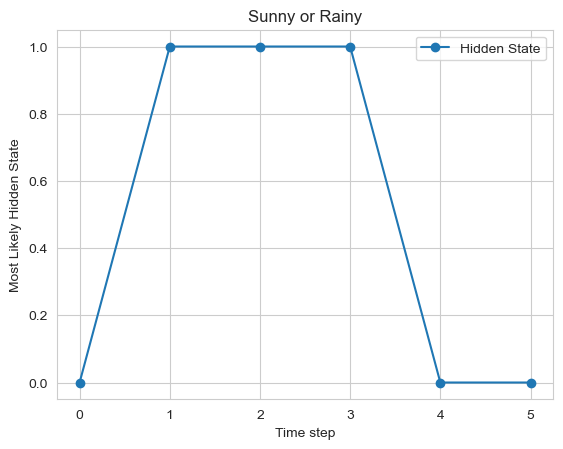

In [10]:
# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Sunny or Rainy")
plt.legend()
plt.show()
